# Jawaban UTS KSC 2021

Nama : Nur Fajar

NPM : 187006102

Kelas : A
    

### Studi Kasus
Beasiswa merupakan tunjangan yang diberikan kepada pelajar atau mahasiswa sebagai bantuan biaya belajar. 
Karena keterbatasan kuota penerima beasiswa, maka dilakukanlah sebuah seleksi untuk mendapatkan beasiswa. Dengan kriteria penyeleksian dinilai dari IPK dan keaktifan.

### Dengan rules sebagai berikut:
1. mempunyai tingkat kelulusan tinggi apabila memiliki nilai IPK yang tinggi dan keaktifan yang tinggi.
2. mempunyai tingkat kelulusan medium apabila memiliki nilai IPK yang cukup dan keaktifan yang cukup.
3. mempunyai tingkat kelulusan rendah apabila memiliki nilai IPK yang kurang dan keaktifan yang kurang.

IPK memiliki nilai dari 0 hingga 4;

Keaktifan memiliki nilai dari 0 hingga 10; dan

Tingkat kelulusan dari 0 hingga 100%.

Dengan contoh satu orang calon penerima beasiswa yaitu bernama Nur Fajar.
Nur Fajar memiliki IPK 3.92 dan memiliki keaktifan dengan nilai 7 dari skala 10.

Pertanyaan: Berapa persen tingkat kelulusan Nur Fajar untuk mendapatkan beasiswa?

##### Saya disini akan menyelesaikan studi kasus diatas dengan menggunakan Metode Fuzzy Mamdani.



In [70]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [71]:
#fungsi keanggotaan Input.
IPK = np.arange(0,5,1)
aktif = np.arange(0,11,1)

#fungsi keanggotaan Output.
lulus = np.arange(0,101,1)

#fungsi keanggotaan IPK
#sebenarnya bisa menggunakan automf, namun untuk penamaannya auto juga.
#dikarenakan terdapat penamaan untuk kategorinya maka diberi nilai secara manual.
ipk_kurang = fuzz.trimf(IPK,[0, 0, 3])
ipk_cukup = fuzz.trimf(IPK,[0, 3, 4])
ipk_tinggi = fuzz.trimf(IPK,[3, 4, 4])

#fungsi keanggotaan keaktifan
#sebenarnya bisa menggunakan automf, namun untuk penamaannya auto juga.
#dikarenakan terdapat penamaan untuk kategorinya maka diberi nilai secara manual.
a_kurang = fuzz.trimf(aktif,[0, 0, 5])
a_cukup = fuzz.trimf(aktif,[0, 5, 10])
a_tinggi = fuzz.trimf(aktif,[5, 10, 10])

#fungsi keanggotaan kelulusan
rendah = fuzz.trimf(lulus,[0, 0, 80])
medium = fuzz.trimf(lulus,[0, 80, 100])
tinggi = fuzz.trimf(lulus,[80, 100, 100])

(-0.05, 1.05)

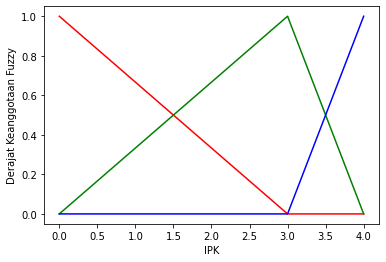

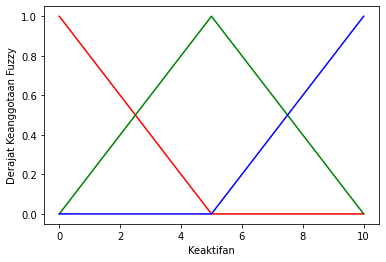

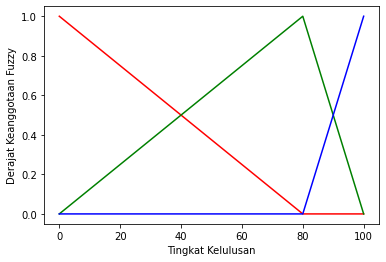

In [73]:
#visualisasi fungsi keanggotaan IPK
fig,ax = plt.subplots()
ax.plot(IPK,ipk_kurang, 'r' ,ipk_cukup, 'g' ,ipk_tinggi, 'b')
ax.set_ylabel('Derajat Keanggotaan Fuzzy')
ax.set_xlabel('IPK')
ax.set_ylim(-0.05,1.05)

#visualisasi fungsi keanggotaan Keaktifan
fig,ax = plt.subplots()
ax.plot(aktif, a_kurang, 'r' ,a_cukup, 'g' ,a_tinggi, 'b')
ax.set_ylabel('Derajat Keanggotaan Fuzzy')
ax.set_xlabel('Keaktifan')
ax.set_ylim(-0.05,1.05)

#visualisasi fungsi keanggotaan Kelulusan
fig,ax = plt.subplots()
ax.plot(lulus,rendah, 'r' ,medium, 'g' ,tinggi, 'b')
ax.set_ylabel('Derajat Keanggotaan Fuzzy')
ax.set_xlabel('Tingkat Kelulusan')
ax.set_ylim(-0.05,1.05)

In [74]:
#fungsi untuk mengukur nilai IPK
def IPK_category(IPK_in = 1):
    IPK_cat_kurang = fuzz.interp_membership(IPK, ipk_kurang, IPK_in)
    IPK_cat_cukup = fuzz.interp_membership(IPK, ipk_cukup, IPK_in)
    IPK_cat_tinggi = fuzz.interp_membership(IPK, ipk_tinggi, IPK_in)
    return dict(Kurang = IPK_cat_kurang, Cukup=IPK_cat_cukup, Tinggi=IPK_cat_tinggi)

#fungsi untuk mengukur nilai Keaktifan
def Aktif_category(aktif_in = 2):
    Aktif_cat_kurang = fuzz.interp_membership(aktif, a_kurang, aktif_in)
    Aktif_cat_cukup = fuzz.interp_membership(aktif, a_cukup, aktif_in)
    Aktif_cat_tinggi = fuzz.interp_membership(aktif, a_tinggi, aktif_in)
    return dict(Kurang_aktif = Aktif_cat_kurang, Cukup_aktif=Aktif_cat_cukup, Aktif_sekali=Aktif_cat_tinggi)

In [75]:
#input
#ditanyakan dalam soal jika Nur Fajar memiliki IPK 3.92 dan memiliki keaktifan dengan nilai 7 dari skala 10.
IPK_in=IPK_category(3.92)
aktif_in=Aktif_category(7)

print("Nilai IPK", IPK_in)
print("Niali Keaktifan", aktif_in)

Nilai IPK {'Kurang': 0.0, 'Cukup': 0.08000000000000007, 'Tinggi': 0.9199999999999999}
Niali Keaktifan {'Kurang_aktif': 0.0, 'Cukup_aktif': 0.6, 'Aktif_sekali': 0.4}


In [76]:
#rule
rule1 = np.fmax((IPK_in['Kurang']), (aktif_in['Kurang_aktif']))
rule2 = np.fmax(IPK_in['Cukup'], (aktif_in['Cukup_aktif']))
rule3 = np.fmax((IPK_in['Tinggi']), (aktif_in['Aktif_sekali']))

imp1 = np.fmin(rule1, rendah)
imp2 = np.fmin(rule2, medium)
imp3 = np.fmin(rule3, tinggi)

imp1.view()
imp2.view()
imp3.view()

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35,
       0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ,
       0.92, 0.92])

In [77]:
#hitung agregat
aggregate_membership=np.fmax(imp1,np.fmin(imp2, imp3))

In [78]:
#Disini saya menggunakan metode defuzzifikasi secara Centroid.
#maka didapatkan result tingkat kelulusan Nur Fajar.
result_lulus = fuzz.defuzz(lulus, aggregate_membership, 'centroid')
print('Maka tingkat kelulusan Nur Fajar dalam mendapatkan beasiswa adalah sebesar', result_lulus, '%.')
lulus_activation = fuzz.interp_membership(lulus, aggregate_membership, result_lulus)

Maka tingkat kelulusan Nur Fajar dalam mendapatkan beasiswa adalah sebesar 90.0 %.


Text(0.5, 0, 'kelulusan')

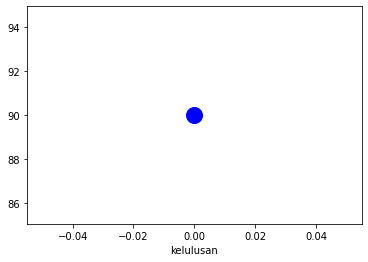

In [79]:
#visualisasi
plt.plot(result_lulus, 'bo', linewidth = 2, markersize = 16)
plt.xlabel("kelulusan")

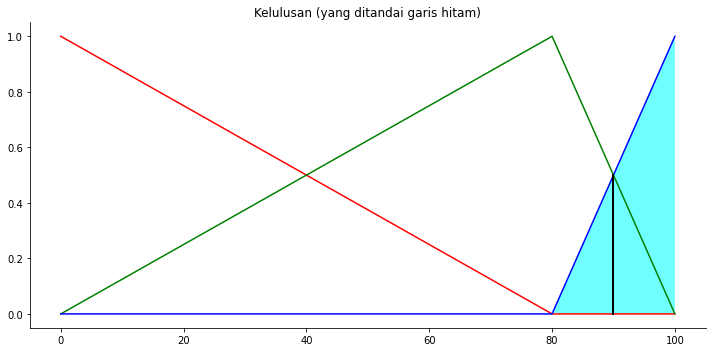

In [80]:
# Visualisasi
fig, ax0 = plt.subplots(figsize = (10,5))

ax0.plot(lulus, rendah, 'r')
ax0.plot(lulus, medium, 'g')
ax0.plot(lulus, tinggi, 'b')
ax0.fill_between(lulus, tinggi, facecolor='cyan', alpha = 0.56)
ax0.plot([result_lulus, result_lulus], [0, lulus_activation], 'k', linewidth=2.0, alpha=1.0)
ax0.set_title('Kelulusan (yang ditandai garis hitam)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [81]:
print('Maka tingkat kelulusan Nur Fajar dalam mendapatkan beasiswa adalah sebesar', result_lulus, '%.')

Maka tingkat kelulusan Nur Fajar dalam mendapatkan beasiswa adalah sebesar 90.0 %.


# Kesimpulan

Dengan menggunakan Metode Mamdani untuk menyelesaikan studi kasus diatas,

maka didapatkan kesimpulan bahwa Nur Fajar memiliki tingkat kelulusan sebesar 90 % untuk mendapatkan beasiswa tersebut.